Inpainting:

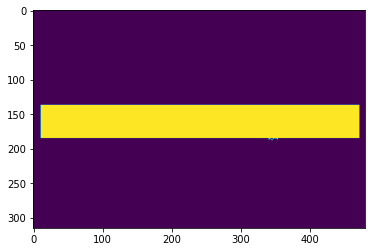

In [ ]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
# Load the image
img = cv2.imread("/content/masked/painted.png")
#img = cv2.resize(img, (448, 448))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[binary == 255] = 255
mask = 255 - mask
cv2.imwrite('mask.png', mask)
plt.imshow(mask)
# # Apply the mask
# mask = binary.copy()
# mask[mask == 0] = 0
# mask[mask == 255] = 1

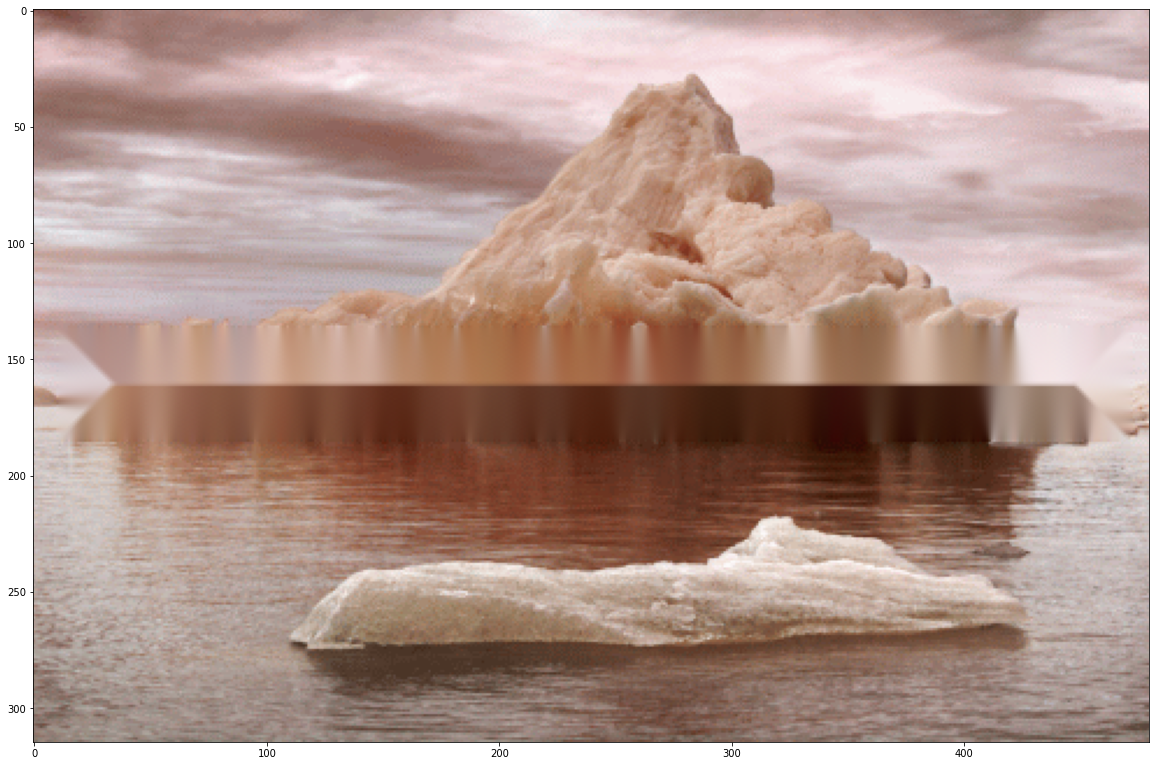

In [ ]:
img = cv2.imread('/content/wm/watermarked_image_sample_text_fits_page.png')
#img = cv2.resize(img, (448, 448))
  
# Load the mask.
mask = cv2.imread('mask.png', 0)
  
# Inpaint.
dst = cv2.inpaint(img, mask, 2, cv2.INPAINT_TELEA)
  
# Write the output.
cv2.imwrite('/content/watermarked_image_sample_text_fits_page.png', dst)

plt.figure(figsize=(20,20))
plt.imshow(dst)

get watermark coordinates

In [ ]:
import cv2
import numpy as np

def crop_watermark(path):
# Load the image
  img = cv2.imread(path)
  img = cv2.resize(img, (448, 448))

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Threshold the image to create a binary image
  _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)

  # Find contours in the binary image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (which corresponds to the black box)
  contour = max(contours, key=cv2.contourArea)

  # Calculate the bounding rectangle of the contour
  x, y, w, h = cv2.boundingRect(contour)

  # Print the coordinates of the bounding rectangle
  
  return x,y,w,h

In [ ]:
!unzip /content/images_all.zip

Archive:  /content/folders.zip
 extracting: masked/965.jpg          
 extracting: masked/928.jpg          
 extracting: masked/1.jpg            
 extracting: masked/116.jpg          
 extracting: orig/965.jpg            
 extracting: orig/928.jpg            
 extracting: orig/1.jpg              
 extracting: orig/116.jpg            
 extracting: result_inpaint/965.jpg  
 extracting: result_inpaint/928.jpg  
 extracting: result_inpaint/1.jpg    
 extracting: result_inpaint/116.jpg  
 extracting: wm/965.jpg              
 extracting: wm/928.jpg              
 extracting: wm/1.jpg                
 extracting: wm/116.jpg              


crop original/inpainted images based on watermark coordinates

<______Comparaison:______>
 


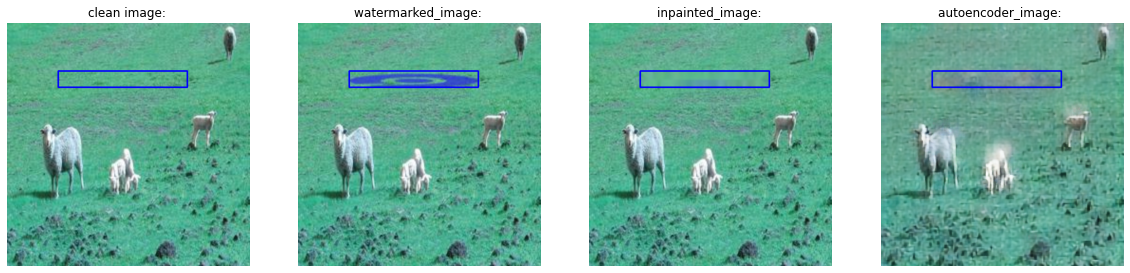

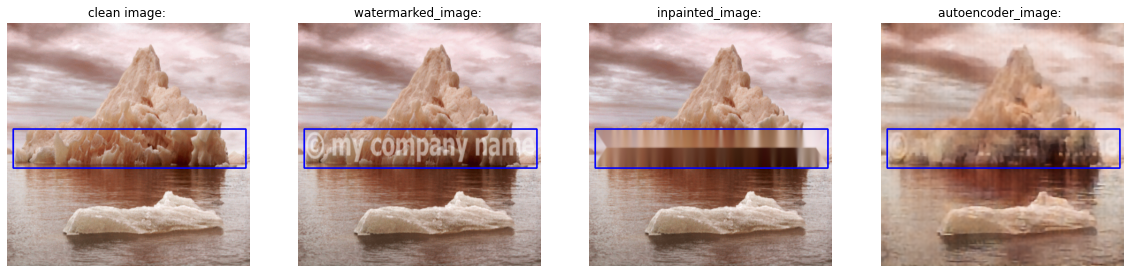

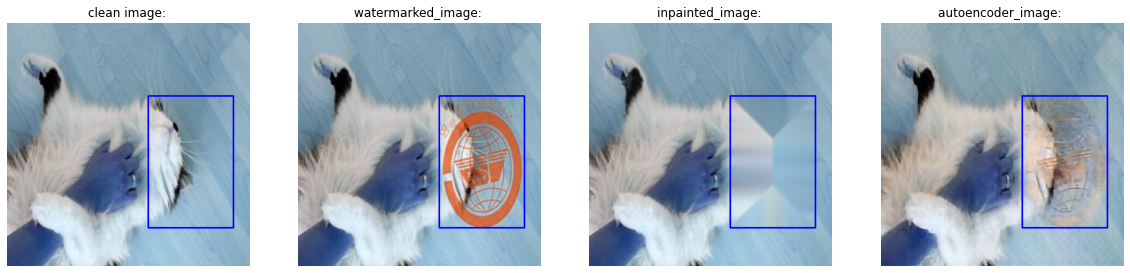

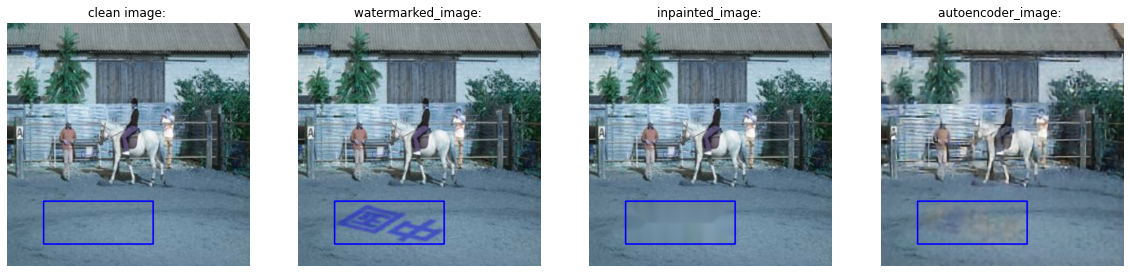

In [ ]:
import os
import matplotlib.pyplot as plt

print("<______Comparaison:______>")
print(" ")
path="/content/masked/"
for i in os.listdir(path):
  try:
    img_masked_path = path+i
    x,y,w,h = crop_watermark(img_masked_path)
    orig_image = cv2.imread("/content/orig/"+i)
    orig_image = cv2.resize(orig_image, (448, 448))
    orig_cropped_img = orig_image[y:y+h, x:x+w]
    rec_orig_image = orig_image.copy()
    cv2.rectangle(rec_orig_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    wm_image = cv2.imread("/content/wm/"+i)
    wm_image = cv2.resize(wm_image, (448, 448))
    wm_cropped_img = wm_image[y:y+h, x:x+w]
    rec_wm_image = wm_image.copy()
    cv2.rectangle(rec_wm_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    inpainted_image = cv2.imread("/content/result_inpaint/"+i)
    inpainted_image = cv2.resize(inpainted_image, (448, 448))
    inpainted_image_cropped_img = inpainted_image[y:y+h, x:x+w]
    rec_inpainted_image = inpainted_image.copy()
    cv2.rectangle(rec_inpainted_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    autoencoder_image = cv2.imread("/content/result_auto_encoder/"+i)
    autoencoder_image = cv2.resize(autoencoder_image, (448, 448))
    autoencoder_image_cropped_img = autoencoder_image[y:y+h, x:x+w]
    rec_autoencoder_image = autoencoder_image.copy()
    cv2.rectangle(rec_autoencoder_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 20))


    ax1.imshow(rec_orig_image)
    ax1.set_title("clean image: ")
    ax1.axis("off")

    ax2.imshow(rec_wm_image)
    ax2.set_title("watermarked_image: ")
    ax2.axis("off")

    ax3.imshow(rec_inpainted_image)
    ax3.set_title("inpainted_image: ")
    ax3.axis("off")

    ax4.imshow(rec_autoencoder_image)
    ax4.set_title("autoencoder_image: ")
    ax4.axis("off")

    plt.show()
  except Exception as e:
    print(e)
    pass
